
#1 Clusterização
O agrupamento é uma técnica para dividir os dados em diferentes grupos, na qual os registros em cada grupo são semelhantes uns aos outros. Os grupos podem ser usados diretamente, analisando mais a fundo ou passados como uma característica ou resultado para um modelo de regressão ou classificação.

#Grupo de Consumidores
Vamos aprender a realizar um modelo de clusterização utilizando um case de segmentação de clientes de um shopping. Como podemos criar grupos de consumidores dado algumas caracteríticas de perfis?

#Sobre a base de dados:
Esse conjunto de dados ilustra alguns dados dos consumidores de um shopping. A base possui algumas features como: gênero, idade, renda anual e pontuação de gastos.




In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score

dados = pd.read_csv("/content/mall.csv", sep=",")
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
dados.shape

(200, 5)

In [9]:
dados.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
dados["Annual Income (k$)"].median()

61.5

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

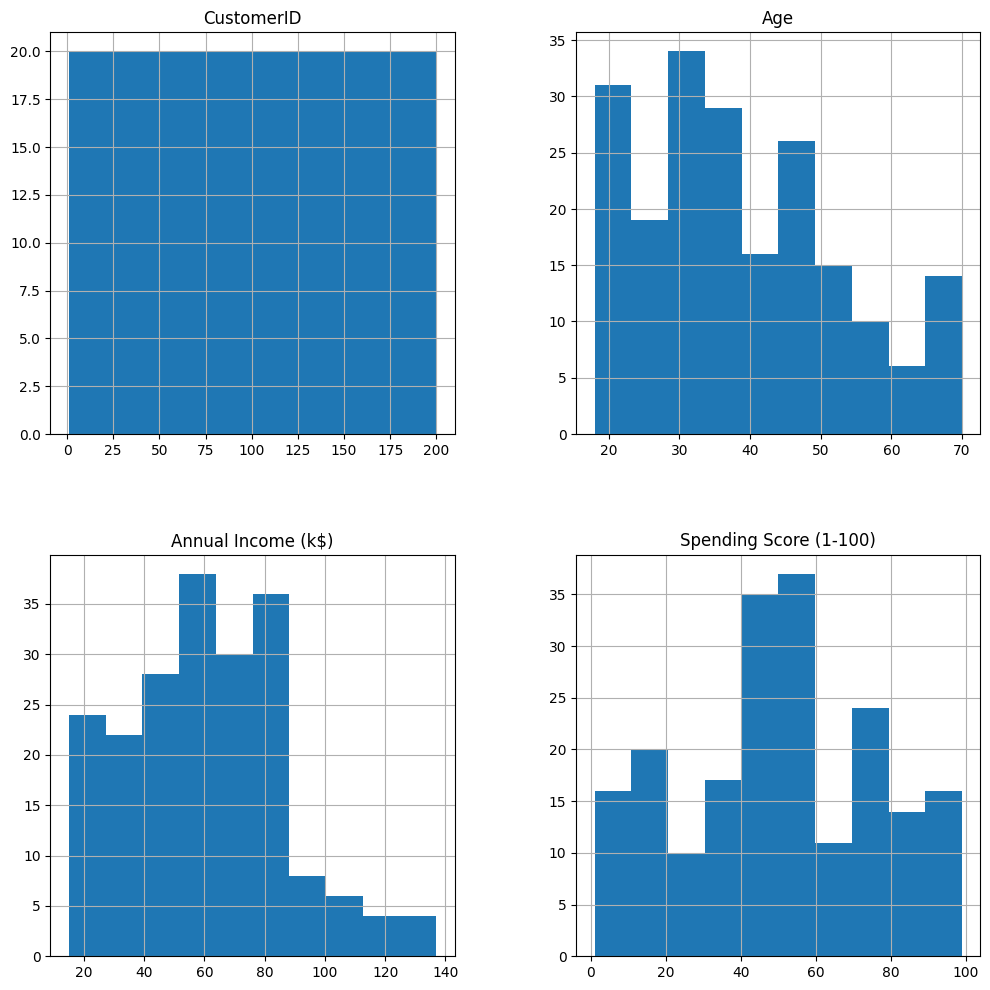

In [13]:
dados.hist(figsize=(12,12))

<Axes: >

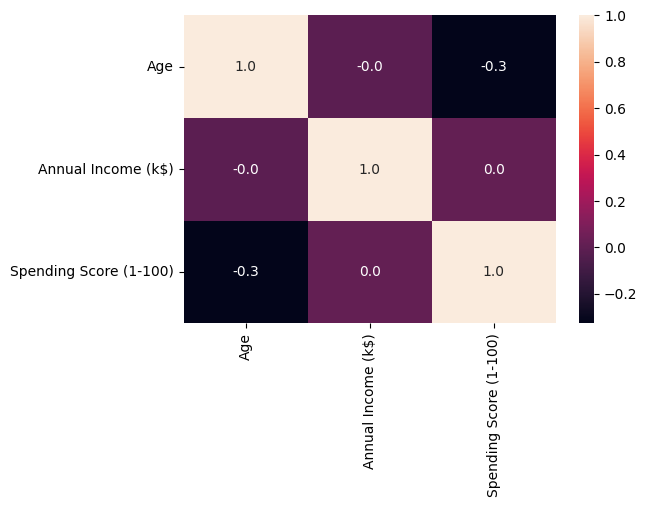

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(dados[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].corr(method="pearson"), annot=True, fmt=".1f")

In [18]:
dados["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

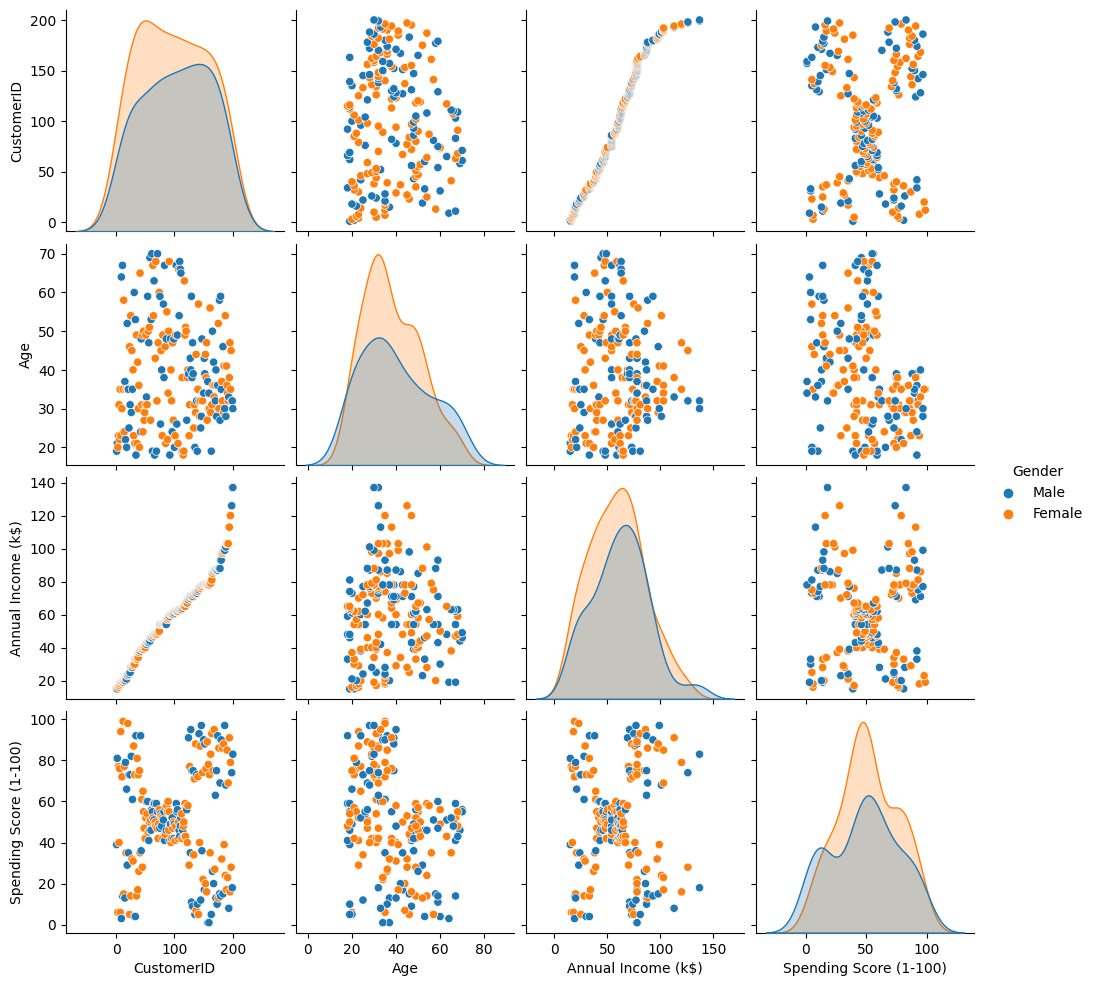

In [19]:
sns.pairplot(dados, hue="Gender")
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
scaler=StandardScaler()
scaler.fit(dados[["Annual Income (k$)", "Spending Score (1-100)"]])

StandardScaler()

In [35]:
dados_escalonados=scaler.transform(dados[["Annual Income (k$)", "Spending Score (1-100)"]])
dados_escalonados

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

#2 - K-Means
Sobre o modelo: O K-Means parte da ideia de quebrar o espaço multidimensional de dados em partições a partir do centróide dos dados. Após inicializar os centróides de forma aleatória sobre os dados, o K-Means calcula a distância dos dados para os centros mais próximos. Esse cálculo da distância é realizado várias vezes até que os dados sejam agrupados da melhor forma possível de acordo com a distância mais próxima de um centróide (ponto centro de dado na qual será formado o grupo).

#Hiperparametros:
Definição do K. Para definir esse valor de K, é necessário utilizar o método Elbow para encontrar o melhor hiperparâmetros de K. O método Elbow consiste no cálculo da soma dos erros quadráticos.

#Vantagens:
Implementação simplificado e possui uma certa facilidade em lidar com qualquer medida de similaridade entre os dados.

#Desvantagem:
Difícil definir o melhor K. Sensível a outliers. Não consegue distinguir grupos em dados não-globulares.

Para mais informação: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Executando o algoritmo sem feature scaling

In [30]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans = KMeans(n_clusters=6,random_state=0) #definindo os hiperparametros do algoritmo (definir o número de grupo = cluster)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans_escalonados = KMeans(n_clusters=6,random_state=0)

#Implementando o K-Means nos dados:
kmeans_escalonados.fit(dados_escalonados)

#Salvando os centroides de cada cluster
centroides_escalonados = kmeans_escalonados.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels_escalonado = kmeans_escalonados.predict(dados_escalonados)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
dados_escalonados=pd.DataFrame(dados_escalonados, columns=["Annual Income (k$)", "Spending Score(1-100)"])
dados_escalonados.head()

,Annual Income (k$),Spending Score(1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [39]:
dados_escalonados["Grupos"] = kmeans_labels_escalonado
dados_escalonados.head()

,Annual Income (k$),Spending Score(1-100),Grupos
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,3
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,3


In [40]:
dados["Grupos"]=kmeans_labels
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [44]:
pd.Series(kmeans_labels).value_counts()

1    81
0    35
5    28
4    23
3    22
2    11
dtype: int64

In [45]:
centroides #espaço tridimensional (salário e score de gasto)

array([[ 88.2       ,  17.11428571],
       [ 55.2962963 ,  49.51851852],
       [108.18181818,  82.72727273],
       [ 25.72727273,  79.36363636],
       [ 26.30434783,  20.91304348],
       [ 78.03571429,  81.89285714]])

#3.1 Clusters com feature scaling

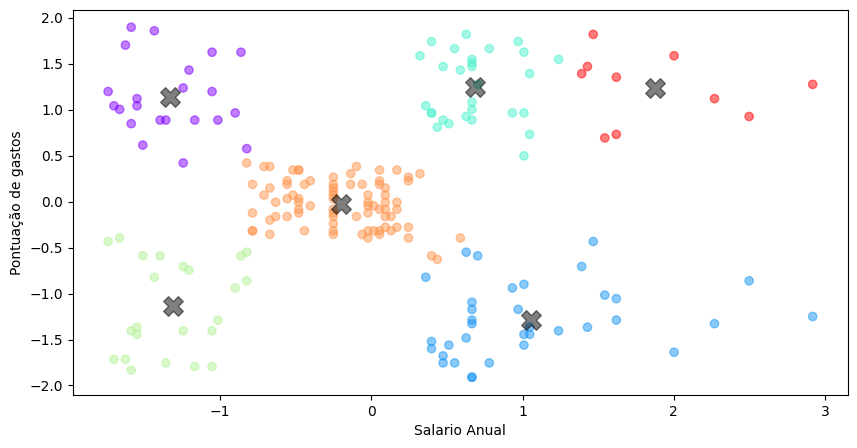

In [55]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados_escalonados[['Annual Income (k$)']], dados_escalonados[['Spending Score(1-100)']], c=kmeans_labels_escalonado, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')

# plotando os centroides
plt.scatter(centroides_escalonados[:, 0], centroides_escalonados[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

#2 Clusters sem feature scaling

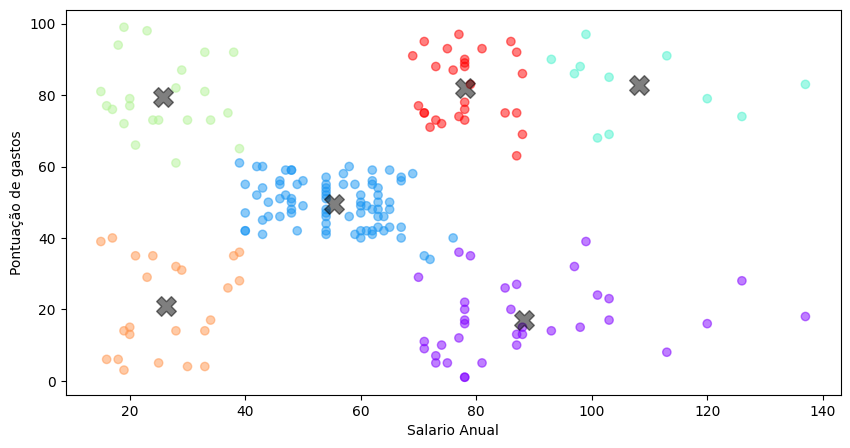

In [56]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

In [57]:
k=list(range(1,10))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

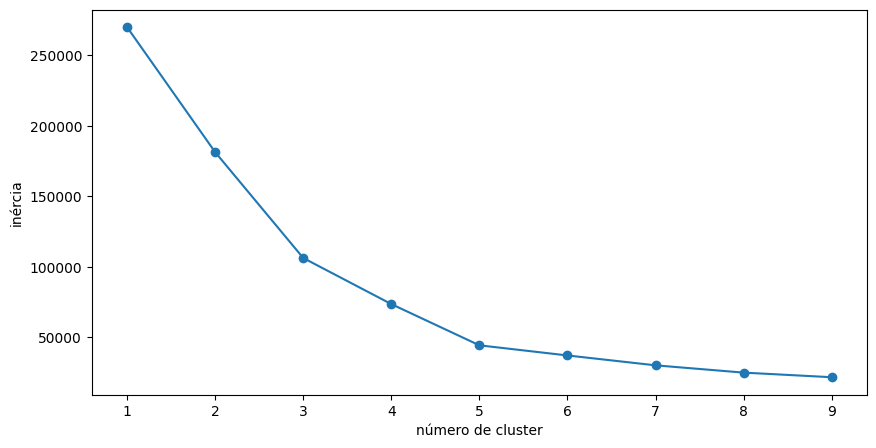

In [62]:
sse=[]
for i in k:
  kmeans=KMeans(n_clusters=i, random_state=0)
  kmeans.fit(dados[["Annual Income (k$)", "Spending Score (1-100)"]])
  sse.append(kmeans.inertia_)

plt.rcParams["figure.figsize"]=(10,5)
plt.plot(k, sse, "-o")
plt.xlabel("número de cluster")
plt.ylabel("inércia")
plt.show()

In [64]:
dados.groupby("Grupos")["Age"].mean()

Grupos
0    41.114286
1    42.716049
2    32.454545
3    25.272727
4    45.217391
5    32.785714
Name: Age, dtype: float64

In [66]:
dados.groupby("Grupos")["Annual Income (k$)"]. mean()

Grupos
0     88.200000
1     55.296296
2    108.181818
3     25.727273
4     26.304348
5     78.035714
Name: Annual Income (k$), dtype: float64

In [67]:
# Definindo o modelo de clusterizacao. K-MEANS com 5 clusters
kmeans = KMeans(n_clusters=5,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


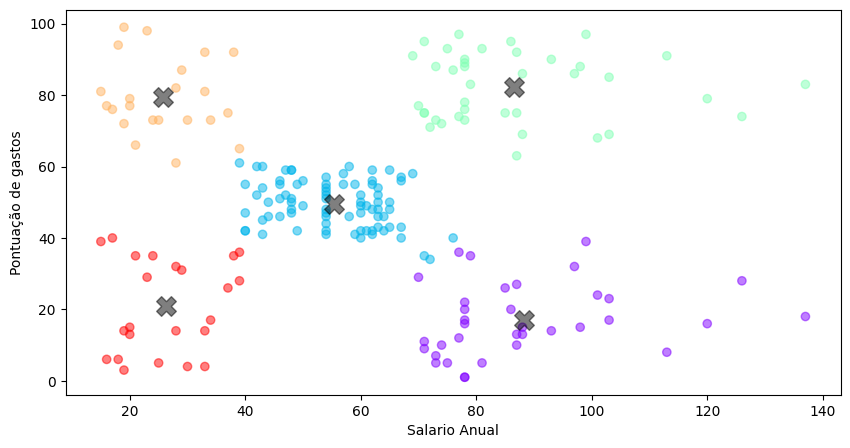

In [68]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

In [70]:
dados_grupo_1 = dados[dados["Grupos"] ==1]
dados_grupo_1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
43,44,Female,31,39,61,1
46,47,Female,50,40,55,1
47,48,Female,27,40,47,1
48,49,Female,29,40,42,1
49,50,Female,31,40,42,1
...,...,...,...,...,...,...
121,122,Female,38,67,40,1
122,123,Female,40,69,58,1
126,127,Male,43,71,35,1
132,133,Female,25,72,34,1


In [71]:
dados_grupo_2 = dados[dados["Grupos"] ==2]
dados_grupo_3 = dados[dados["Grupos"] ==3]
dados_grupo_4 = dados[dados["Grupos"] ==4]
dados_grupo_5 = dados[dados["Grupos"] ==5]

In [73]:
dados_grupo_1["Annual Income (k$)"].mean()

55.2962962962963

In [74]:
dados_grupo_2["Annual Income (k$)"].mean()

108.18181818181819

In [75]:
dados_grupo_3["Annual Income (k$)"].mean()

25.727272727272727

In [76]:
dados_grupo_4["Annual Income (k$)"].mean()

26.304347826086957

In [77]:
dados_grupo_5["Annual Income (k$)"].mean()

78.03571428571429

In [79]:
dados_grupo_1["Age"].mean()

42.71604938271605

In [80]:
dados_grupo_2["Age"].mean()

32.45454545454545

In [81]:
dados_grupo_3["Age"].mean()

25.272727272727273

In [82]:
dados_grupo_4["Age"].mean()

45.21739130434783

In [83]:
dados_grupo_5["Age"].mean()

32.785714285714285

In [84]:
dados_grupo_1["Spending Score (1-100)"].mean()

49.51851851851852

In [85]:
dados_grupo_2["Spending Score (1-100)"].mean()

82.72727272727273

In [86]:
dados_grupo_3["Spending Score (1-100)"].mean()

79.36363636363636

In [87]:
dados_grupo_4["Spending Score (1-100)"].mean()

20.91304347826087

In [88]:
dados_grupo_5["Spending Score (1-100)"].mean()

81.89285714285714

<ipython-input-89-2c1fd29c47cc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.heatmap(dados_grupo_1.groupby('Grupos').corr(method = 'pearson'), annot=True, fmt=".1f");


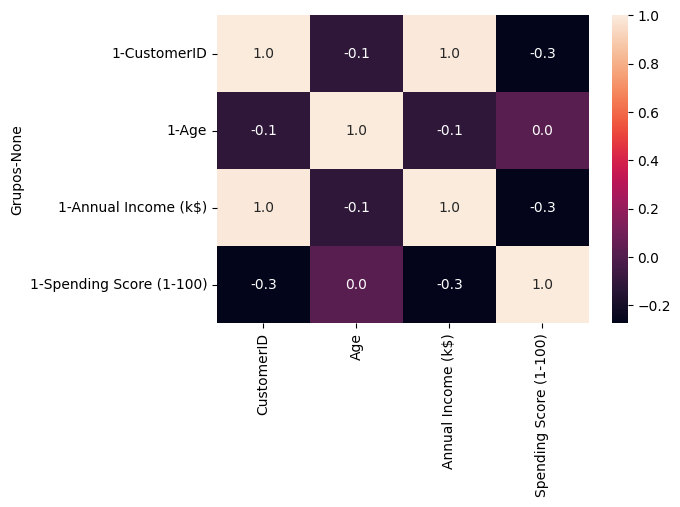

In [89]:
plt.figure(figsize=(6,4))
sns.heatmap(dados_grupo_1.groupby('Grupos').corr(method = 'pearson'), annot=True, fmt=".1f");

#3.3 - DBSCAN
Sobre o modelo: O DBSCAN é um algoritmo que agrupa os dados com base em densidade (alta concentração de dados). Muito bom para tirar ruídos. O agrupamentos dos dados é calculado com base nos core (quantidade de pontos mínmos que seja igual ou maior a definição do MinPts), border (ponto de fronteira dos dados) e noise (ruído).

#Hiperparametro:
Eps (raio ao redor de um dado). MinPts (mínimo de pontos dentro do raio para que seja agrupado).

#Vantagem:
Capacidade de trabalhar com outliers. Trabalha com base de dados grande.

#Desvantagem:
Dificuldade para lidar com cluster dentro de cluster. Dificuldade para lidar com dados de alta dimensionalidade. Dificuldade em encontrar o raio de vizinhança ao tentar agrupar dados com distância média muito distinta (clusters mais densos que outros).

Para mais informação: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [90]:
#Criando o modelo:
dbscan = DBSCAN(eps=10, min_samples=8)
#Ajustando aos dados
dbscan.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

dbscan_labels = dbscan.labels_
dbscan_labels

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0, -1, -1,  2,  0,  1,  0,  1, -1,
       -1,  0, -1,  0,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

#Labels com -1 foram classificados como outliers

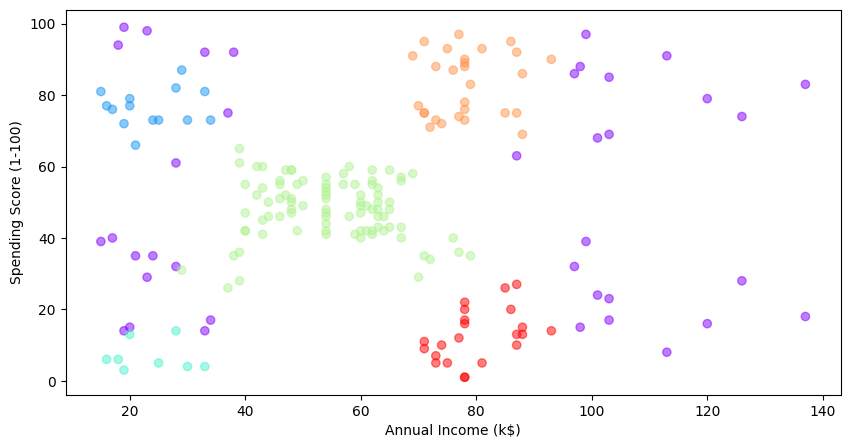

In [91]:
#Plotando o grafico:
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

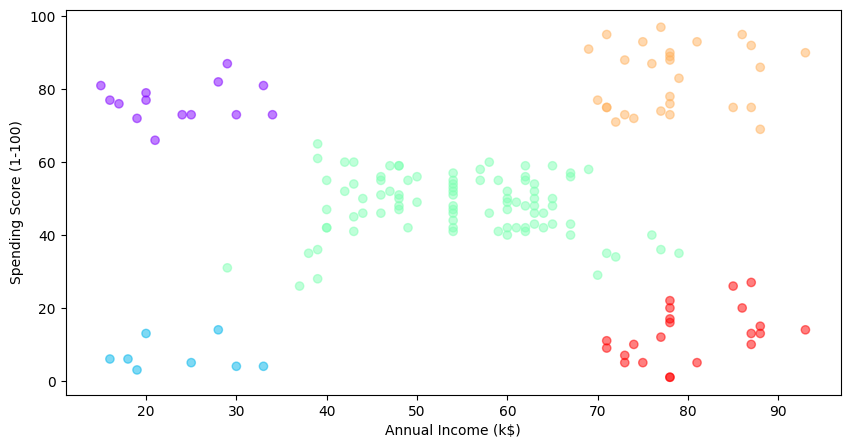

In [92]:
#Plotando o grafico sem os outliers:
#mascara para outlier
mascara = dbscan_labels>=0

#plotando o gráfico
plt.scatter(dados[['Annual Income (k$)']][mascara],dados[['Spending Score (1-100)']][mascara], c=dbscan_labels[mascara], alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [93]:
list(mascara).count(False)

38

#3.4 Como validar uma clusterização?
Temos dois tipos:

Interna: Quanto bom foi o meu agrupamento?
Externa: Como parecido estão os meus dois algoritmos comparados?
#Avaliando o Desempenho dos Algoritmos
Tipo Externo:
(a) Usando o Adjusted Rand Index

Compara o desempenho quando forem fornecidos datasets com labels geradas de forma aleatória. Quando essas labels estão muito diferente, o valor se aproxima de 0, o que sugere um resultado negativo, ou seja, clusters não próximos.

Comparação entre K-Means e DBSCAN:

In [94]:
adjusted_rand_score(kmeans_labels,dbscan_labels)

0.7151933782093212

#Tipo interno:
(b) Avaliando a métrica de Silhouette

Mede o formato do cluster obtido: avalia a distância entre os centros dos clusters, nesse caso, queremos maximizar as distâncias)

Valores próximos a -1, significa clusters ruins, próximo a 1, clusters bem separados.

In [95]:
#KMEANS
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],kmeans_labels)

0.553931997444648

In [96]:
#DBSCAN
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],dbscan_labels)

0.36328873885121793

# 4. Segmentação de Imagens de Câncer de Mama
Vamos usar o dataset mini-MIAS disponível em http://peipa.essex.ac.uk/info/mias.html.

#Este dataset possui 322 imagens de mamografias.

A Segmentação de Imagem envolve em colorir de uma mesma cor objetos ou partes de interesse. No caso do nosso dataset, iremos usar a segmentação de imagem para reduzir a resolução, aumentando o contraste entre diferentes regiões dos tecidos representados na imagem de mamografia.

O dataset é mais detalhado, possuindo inclusive tipos de câncer e anormalidades que ocorrem em cada uma das imagens.

Vamos apenas aplicar o K-Means em algumas imagens para observar o resultado:

In [97]:
# Para processar arquivos e imagens
from PIL import Image
import glob
import numpy as np

# Para plotar imagens
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.cluster import KMeans # Agrupamento

In [98]:
# Carregando as imagens

img_G = mpimg.imread('mdb001.pgm') # Tipo G
img_D = mpimg.imread('mdb003.pgm') # Tipo D
img_F = mpimg.imread('mdb005.pgm') # Tipo F

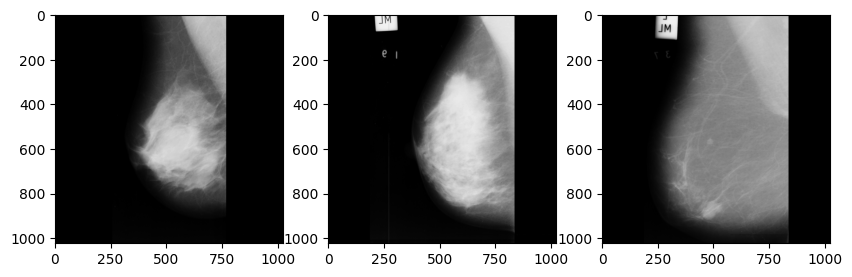

In [99]:
# Plotando as imagens

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(img_G, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F, cmap='gray', vmin=0, vmax=255)
plt.show()

In [100]:
# Essa função usa o Kmeans como um filtro de segmentação de imagem

def filtro_kmeans(img, clusters):
    vectorized = img.reshape((-1,1))
    kmeans = KMeans(n_clusters=clusters, random_state = 0, n_init=5)
    kmeans.fit(vectorized)

    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_.flatten()]

    segmented_image = segmented_data.reshape((img.shape))
    return(segmented_image)

In [101]:
clusters = 3

img_G_segmentada = filtro_kmeans(img_G, clusters) # Tipo G
img_D_segmentada = filtro_kmeans(img_D, clusters) # Tipo D
img_F_segmentada = filtro_kmeans(img_F, clusters) # Tipo F

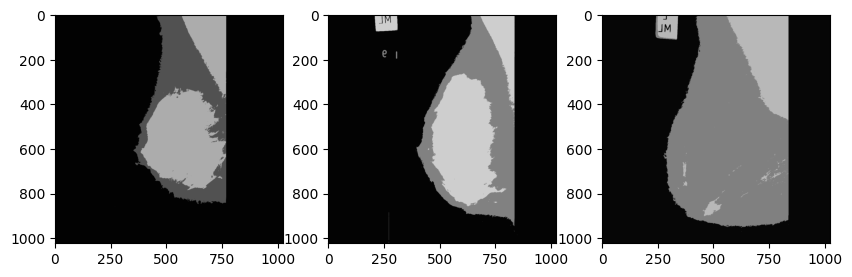

In [102]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(img_G_segmentada, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D_segmentada, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F_segmentada, cmap='gray', vmin=0, vmax=255)
plt.show()

Para mais informações de aplicação de técnicas de Agrupamento na segmentação de imagens, https://experiencor.github.io/segmentation.html